**Step - 1 : Business Problem Understanding

Predict SALARY of a person based on input variable

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Step- 2 : Data Understanding 

Load Data & Understand Each And Every Variable 

In [2]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score,interview_score,salary
0,NaN,8,9,50000
1,NaN,8,6,45000
2,5.0,6,7,60000
3,2.0,10,10,65000
4,7.0,9,6,70000
5,3.0,7,10,62000
6,10.0,7,7,72000
7,11.0,7,8,80000


In [3]:
df.columns

Index(['experience', 'test_score', 'interview_score', 'salary'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       6 non-null      float64
 1   test_score       8 non-null      int64  
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 388.0 bytes


In [5]:
df.shape

(8, 4)

In [6]:
df.isnull().sum()

experience         2
test_score         0
interview_score    0
salary             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['experience'].fillna(0,inplace=True)

In [28]:
df

,experience,test_score,interview_score,salary
0,0.0,8,9,50000
1,0.0,8,6,45000
2,5.0,6,7,60000
3,2.0,10,10,65000
4,7.0,9,6,70000
5,3.0,7,10,62000
6,10.0,7,7,72000
7,11.0,7,8,80000


In [9]:
continous = ['experience','test_score','interview_score']

In [ ]:
**Exploratory Data Analysis

In [10]:
df[continous].describe()

,experience,test_score,interview_score
count,8.00000,8.00000,8.000000
mean,4.75000,7.75000,7.875000
std,4.26782,1.28174,1.642081
min,0.00000,6.00000,6.000000
25%,1.50000,7.00000,6.750000
50%,4.00000,7.50000,7.500000
75%,7.75000,8.25000,9.250000
max,11.00000,10.00000,10.000000


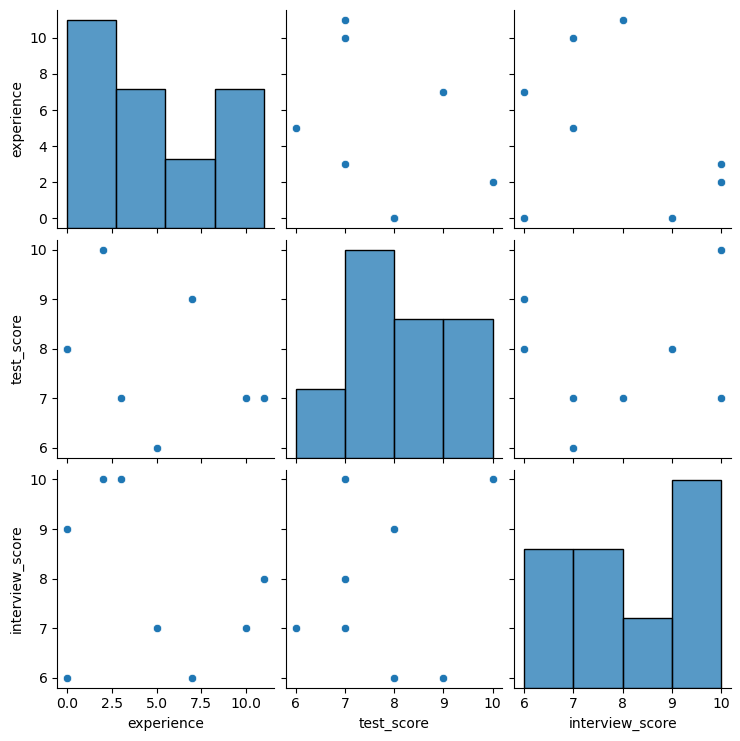

In [11]:
sns.pairplot(df[continous])
plt.show()

In [12]:
df[continous].skew()

experience         0.391438
test_score         0.610583
interview_score    0.262145
dtype: float64

In [13]:
df.corr()

,experience,test_score,interview_score,salary
experience,1.000000,-0.352557,-0.290480,0.908017
test_score,-0.352557,1.000000,0.186655,-0.077524
interview_score,-0.290480,0.186655,1.000000,0.037820
salary,0.908017,-0.077524,0.037820,1.000000


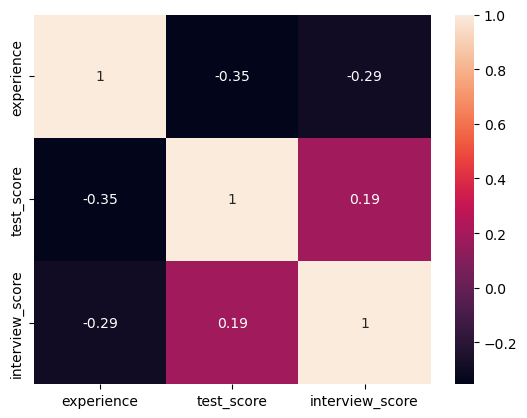

In [14]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

<Figure size 1200x1000 with 0 Axes>

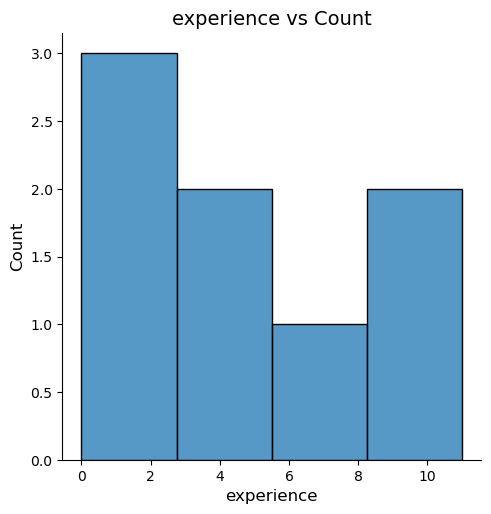

In [15]:
# Experience  vs Count

plt.figure(figsize=(12,10))
sns.displot(df['experience'])
plt.xlabel('experience',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('experience vs Count' ,fontsize=14)
plt.show()

<Figure size 1200x1000 with 0 Axes>

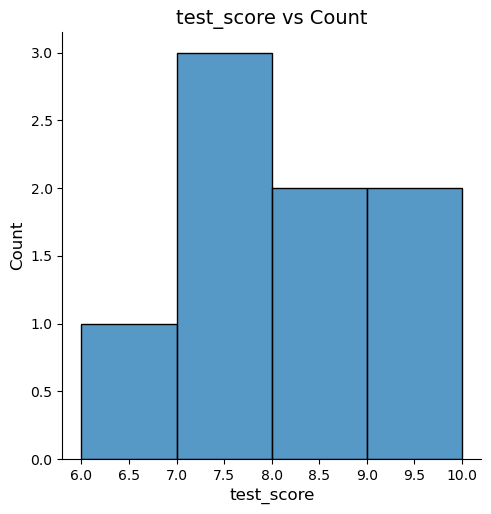

In [16]:
# Test_Score  vs   Count

plt.figure(figsize=(12,10))
sns.displot(df['test_score'])
plt.xlabel('test_score',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('test_score vs Count' ,fontsize=14)
plt.show()

<Figure size 1200x1000 with 0 Axes>

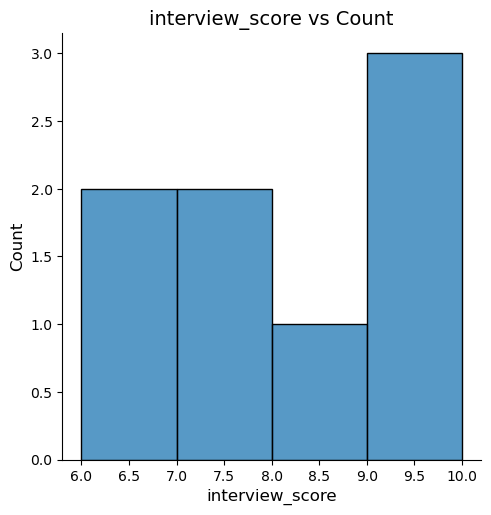

In [17]:
# Interview_Score  vs   Count

plt.figure(figsize=(12,10))
sns.displot(df['interview_score'])
plt.xlabel('interview_score',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('interview_score vs Count' ,fontsize=14)
plt.show()

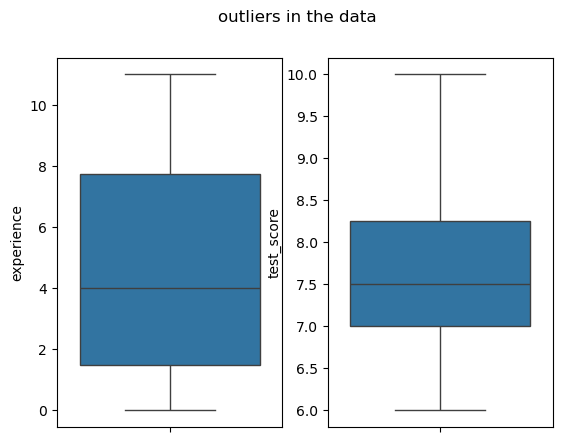

In [18]:
plt.subplot(1,2,1)
sns.boxplot(df['experience'])


plt.subplot(1,2,2)
sns.boxplot(df['test_score'])

plt.suptitle('outliers in the data')
plt.show()

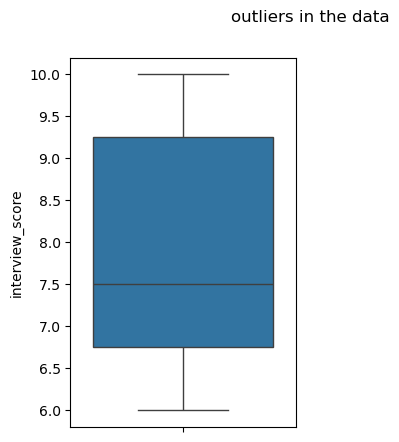

In [19]:
plt.subplot(1,2,1)
sns.boxplot(df['interview_score'])

plt.suptitle('outliers in the data')
plt.show()

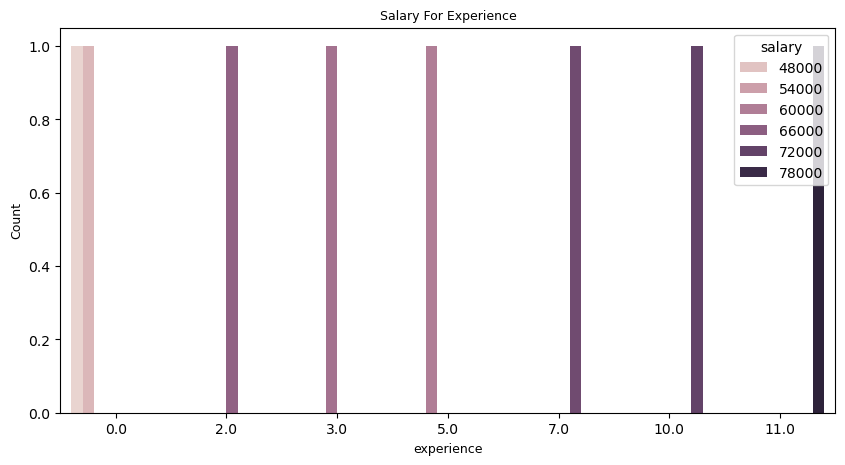

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['experience'],hue=df['salary'])
plt.xlabel('experience',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.title('Salary For Experience',fontsize=9)
plt.show()

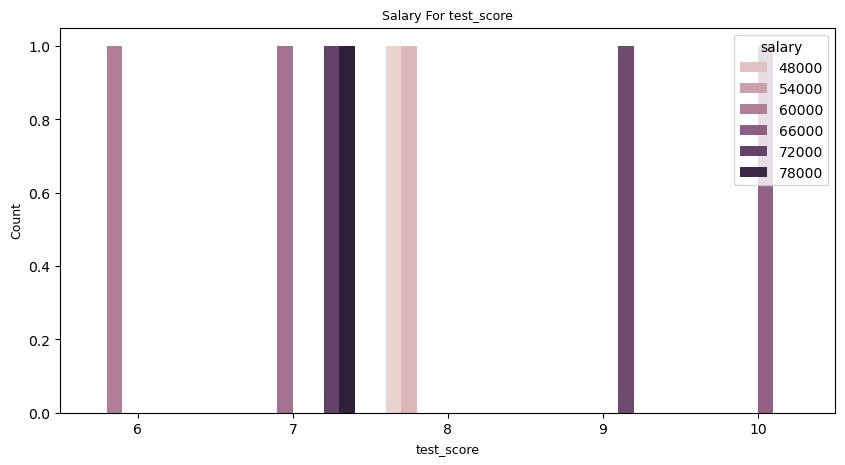

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['test_score'],hue=df['salary'])
plt.xlabel('test_score',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.title('Salary For test_score',fontsize=9)
plt.show()

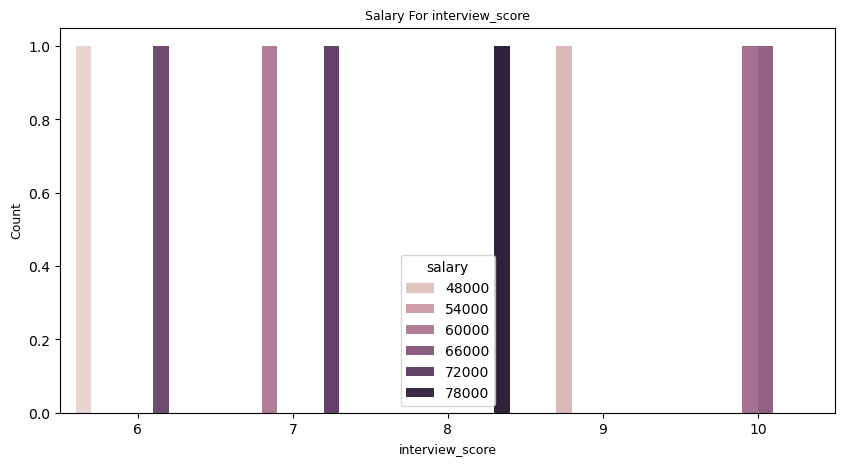

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['interview_score'],hue=df['salary'])
plt.xlabel('interview_score',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.title('Salary For interview_score',fontsize=9)
plt.show()

X&y

In [24]:
X = df.drop('salary',axis=1)
y = df['salary']

**Train-Test-Split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [27]:
X_train

,experience,test_score,interview_score
0,0.0,8,9
7,11.0,7,8
2,5.0,6,7
4,7.0,9,6
3,2.0,10,10
6,10.0,7,7


In [47]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
print('Intercept:',lr.intercept_)
print('Coefficient:',lr.coef_)

Intercept: 18318.126953669038
Coefficient: [2830.30546873 2487.69768809 1512.95224537]


In [ ]:
**Evaluation

In [30]:
from sklearn.metrics import r2_score
ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

print('train R2:', lr.score(X_train,y_train))
print('test R2:', lr.score(X_test,y_test))

train R2: 0.9693519821492191
test R2: 0.9149642180753452


In [ ]:
**Saving The Model 

In [49]:
from joblib import dump              #syntax :dump(modelname,save the file)
dump(lr_model,'model.joblib')

['model.joblib']

In [50]:
from pickle import dump
dump(lr_model,open('model.pkl','wb'))

In [ ]:
**Final Model

In [ ]:
#18318.126953669038 + 2830.30546873*exp + 2487.69768809*t_s + 1512.95224537*i_s

In [43]:
 2830.30546873*0 + 2487.69768809*9 + 1512.95224537*10 + 18318.126953669038 

55836.92860017904

In [48]:
lr_model.predict([[0,9,10]])

array([55836.92860017])

In [ ]:
**This Values Will Be Substiuted On Model/Equations